In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
os.listdir()

['.ipynb_checkpoints', 'brain_tumor_final', 'original', 'pre_processing.ipynb']

In [3]:
data_folder = 'brain_tumor_final//'
os.listdir(data_folder)

['0', '1']

In [4]:
positive_class_nos = len(os.listdir(data_folder+"1//"))
negative_class_nos = len(os.listdir(data_folder+"0//"))

In [5]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Text(0.5, 1.0, 'Number of images in each class')

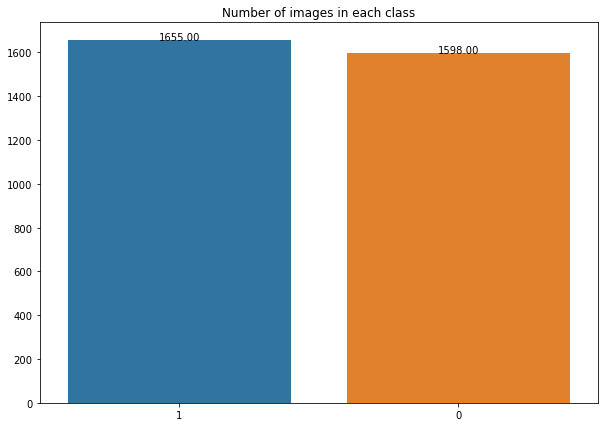

In [9]:
labels = ['1','0']

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(x = labels, y = [positive_class_nos,negative_class_nos])
show_values_on_bars(ax)
plt.title("Number of images in each class")

In [10]:
os.mkdir(data_folder+'train//')
os.mkdir(data_folder + 'test//')
os.mkdir(data_folder + 'val//')

In [11]:
def move_imgs(src, dst, nos):
    
    src_imgs = os.listdir(src)
    
    for i in range(nos):
        rand_img = random.choice(src_imgs)
        shutil.move(src + rand_img, dst)
        src_imgs.remove(rand_img)

In [12]:
train_size = 0.7
val_test_size = 0.15

positive_imgs_nos = 1655
positive_train_imgs_nos = round(train_size * positive_imgs_nos)
positive_val_imgs_nos = round(val_test_size * positive_imgs_nos)
positive_test_imgs_nos = round(val_test_size * positive_imgs_nos)

negative_imgs_nos = 1598
negative_train_imgs_nos = round(train_size * negative_imgs_nos)
negative_val_imgs_nos = round(val_test_size * negative_imgs_nos)
negative_test_imgs_nos = round(val_test_size * negative_imgs_nos)

In [13]:
os.mkdir(data_folder + 'train//0//')
os.mkdir(data_folder +'train//1//')

os.mkdir(data_folder + 'val//0//')
os.mkdir(data_folder +'val//1//')

os.mkdir(data_folder + 'test//0//')
os.mkdir(data_folder +'test//1//')

In [14]:
move_imgs(data_folder +'1//',data_folder + 'train//1//',positive_train_imgs_nos)
move_imgs(data_folder +'1//',data_folder + 'val//1//',positive_val_imgs_nos)
move_imgs(data_folder +'1//',data_folder + 'test//1//',positive_test_imgs_nos)

move_imgs(data_folder +'0//',data_folder + 'train//0//',negative_train_imgs_nos)
move_imgs(data_folder +'0//',data_folder + 'val//0//', negative_val_imgs_nos)
move_imgs(data_folder +'0//',data_folder + 'test//0//', negative_test_imgs_nos)

IndexError: Cannot choose from an empty sequence